In [6]:
%matplotlib inline 
#有了matplotlib inline 就可以省掉plt.show()了
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *
#import pylab #使用pylab模式，可以直接使用numpy、pandas和绘图，而不需要再次引入,会配置为使用你所指定的matplotlib gui后端，还会提供一种更接近于matlab的界面
#%pylab
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Toggle code

## 用pandas导入数据

In [7]:
filename = './csvs/user_label_day_0201.csv'
dataset = pd.read_csv(filename)


## 数据理解

In [8]:
# 数据行列数
dataset.shape
# 简单查看数据
dataset.head(10)
# 字段的数据类型
dataset.dtypes
# 描述统计
dataset.describe()
# 数据分组分布（适用于分类算法）
dataset.groupby('user_label_day.play_passion').size()

(963225, 17)

,user_label_day.fgamefsk,user_label_day.fgamename,user_label_day.fplatformfsk,user_label_day.fplatformname,user_label_day.fuid,user_label_day.if_new_user,user_label_day.play_passion,user_label_day.play_duration,user_label_day.play_innings,user_label_day.pay_passion,user_label_day.pay_sum,user_label_day.pay_sum_usd,user_label_day.pay_count,user_label_day.match_passion,user_label_day.match_duration,user_label_day.match_innings,user_label_day.dt
0,1396894,德州扑克,60321409,新浪平台,1318,N,3,483,18,0,0.0,0.0,0,0,0,0,2018-02-01
1,1396894,德州扑克,60321409,新浪平台,3778,N,45,9244,390,0,0.0,0.0,0,0,0,0,2018-02-01
2,1396894,德州扑克,60321409,新浪平台,16710,N,5,1694,13,0,0.0,0.0,0,0,0,0,2018-02-01
3,1396894,德州扑克,60321409,新浪平台,19880,N,2,386,13,0,0.0,0.0,0,0,0,0,2018-02-01
4,1396894,德州扑克,60321409,新浪平台,21896,N,2,340,9,0,0.0,0.0,0,0,0,0,2018-02-01
5,1396894,德州扑克,60321409,新浪平台,39266,N,1,23,4,0,0.0,0.0,0,0,0,0,2018-02-01
6,1396894,德州扑克,60321409,新浪平台,49832,N,1,108,13,0,0.0,0.0,0,0,0,0,2018-02-01
7,1396894,德州扑克,60321409,新浪平台,61414,N,5,653,34,0,0.0,0.0,0,0,0,0,2018-02-01
8,1396894,德州扑克,60321409,新浪平台,66392,N,14,5107,41,0,0.0,0.0,0,0,0,0,2018-02-01
9,1396894,德州扑克,60321409,新浪平台,85480,N,35,4053,395,0,0.0,0.0,0,0,0,0,2018-02-01


user_label_day.fgamefsk            int64
user_label_day.fgamename          object
user_label_day.fplatformfsk        int64
user_label_day.fplatformname      object
user_label_day.fuid                int64
user_label_day.if_new_user        object
user_label_day.play_passion        int64
user_label_day.play_duration       int64
user_label_day.play_innings        int64
user_label_day.pay_passion         int64
user_label_day.pay_sum           float64
user_label_day.pay_sum_usd       float64
user_label_day.pay_count           int64
user_label_day.match_passion       int64
user_label_day.match_duration      int64
user_label_day.match_innings       int64
user_label_day.dt                 object
dtype: object

,user_label_day.fgamefsk,user_label_day.fplatformfsk,user_label_day.fuid,user_label_day.play_passion,user_label_day.play_duration,user_label_day.play_innings,user_label_day.pay_passion,user_label_day.pay_sum,user_label_day.pay_sum_usd,user_label_day.pay_count,user_label_day.match_passion,user_label_day.match_duration,user_label_day.match_innings
count,9.632250e+05,9.632250e+05,9.632250e+05,963225.000000,963225.000000,963225.000000,963225.000000,9.632250e+05,963225.000000,963225.000000,963225.000000,963225.000000,963225.000000
mean,2.637688e+09,7.318165e+07,1.231182e+08,20.196765,2762.800205,46.693600,0.423878,3.091210e+01,0.239462,0.036698,2.246843,115.936727,1.273155
std,1.985013e+09,1.055602e+08,2.916088e+08,22.197184,3995.824935,125.214362,3.759273,6.978134e+03,72.838129,0.415964,9.828826,692.283274,7.560675
min,1.396894e+06,6.032141e+07,1.300000e+01,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.396894e+06,6.078437e+07,1.000363e+07,3.000000,451.000000,7.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.132314e+09,7.700020e+07,1.934766e+07,11.000000,1365.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.132314e+09,7.700020e+07,4.068891e+07,31.000000,3455.000000,46.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.132314e+09,4.619040e+10,1.002605e+09,100.000000,78762.000000,18189.000000,100.000000,6.074500e+06,52851.640000,59.000000,100.000000,76066.000000,989.000000


user_label_day.play_passion
1      149684
2       65960
3       50683
4       40825
5       34237
6       30757
7       27222
8       25027
9       24439
10      21744
11      19463
12      18066
13      17097
14      15849
15      15094
16      14455
17      13812
18      12995
19      12659
20      12253
21      11694
22      11058
23      10736
24      10190
25       9747
26       9719
27       9107
28       8953
29       8613
30       8324
        ...  
71       2586
72       2519
73       2463
74       2384
75       2277
76       2217
77       2083
78       2142
79       1973
80       1845
81       1852
82       1810
83       1710
84       1602
85       1582
86       1433
87       1397
88       1366
89       1242
90       1158
91       1122
92       1020
93        973
94        862
95        839
96        657
97        554
98        444
99        318
100       180
Length: 100, dtype: int64

#### 数据属性的相关性
通用的计算方法是皮尔逊相关系数，1表示完全正相关，0表示无关，-1表示完全负相关  
如果数据特征的相关性较高时，应该考虑对特征进行降维处理  

In [9]:
from pandas import set_option
# 用set_option 设置输出值的显示
#set_option('display.width',100) # 每一列展示的最大宽度
set_option('precision',2) # 精度为2
dataset.corr(method='pearson') # e表示为10

,user_label_day.fgamefsk,user_label_day.fplatformfsk,user_label_day.fuid,user_label_day.play_passion,user_label_day.play_duration,user_label_day.play_innings,user_label_day.pay_passion,user_label_day.pay_sum,user_label_day.pay_sum_usd,user_label_day.pay_count,user_label_day.match_passion,user_label_day.match_duration,user_label_day.match_innings
user_label_day.fgamefsk,1.00e+00,4.80e-02,1.88e-01,1.56e-01,8.72e-02,-1.82e-01,3.28e-02,-5.86e-03,-3.92e-03,1.61e-02,1.72e-01,1.26e-01,1.27e-01
user_label_day.fplatformfsk,4.80e-02,1.00e+00,8.74e-03,1.14e-02,3.54e-03,-1.10e-02,1.31e-03,-5.18e-04,-3.28e-04,4.62e-04,8.27e-03,6.06e-03,6.09e-03
user_label_day.fuid,1.88e-01,8.74e-03,1.00e+00,3.69e-02,-1.59e-02,-3.95e-02,-2.57e-02,-1.35e-03,-8.53e-05,-2.30e-02,7.96e-02,5.34e-03,3.65e-03
user_label_day.play_passion,1.56e-01,1.14e-02,3.69e-02,1.00e+00,8.70e-01,4.89e-01,1.50e-01,5.82e-03,2.91e-04,1.26e-01,1.82e-01,1.82e-01,1.78e-01
user_label_day.play_duration,8.72e-02,3.54e-03,-1.59e-02,8.70e-01,1.00e+00,5.58e-01,1.32e-01,7.89e-03,9.12e-04,1.19e-01,1.17e-01,1.52e-01,1.46e-01
user_label_day.play_innings,-1.82e-01,-1.10e-02,-3.95e-02,4.89e-01,5.58e-01,1.00e+00,8.42e-02,7.53e-03,3.03e-03,8.66e-02,1.11e-02,3.18e-02,3.36e-02
user_label_day.pay_passion,3.28e-02,1.31e-03,-2.57e-02,1.50e-01,1.32e-01,8.42e-02,1.00e+00,4.21e-02,5.50e-02,7.82e-01,9.35e-02,1.22e-01,1.36e-01
user_label_day.pay_sum,-5.86e-03,-5.18e-04,-1.35e-03,5.82e-03,7.89e-03,7.53e-03,4.21e-02,1.00e+00,7.43e-02,1.43e-01,-9.96e-04,-7.19e-04,-7.21e-04
user_label_day.pay_sum_usd,-3.92e-03,-3.28e-04,-8.53e-05,2.91e-04,9.12e-04,3.03e-03,5.50e-02,7.43e-02,1.00e+00,8.31e-02,-4.68e-04,-1.87e-04,-1.54e-04
user_label_day.pay_count,1.61e-02,4.62e-04,-2.30e-02,1.26e-01,1.19e-01,8.66e-02,7.82e-01,1.43e-01,8.31e-02,1.00e+00,7.75e-02,1.13e-01,1.27e-01


#### 数据的分布分析
通过分析数据的高斯分布情况来确认数据的偏离情况

In [10]:
# skew()函数的结果显示了分布是左偏还是右偏。当数据接近0时，表示偏差非常小
dataset.skew()

user_label_day.fgamefsk           -0.58
user_label_day.fplatformfsk      432.85
user_label_day.fuid                2.63
user_label_day.play_passion        1.36
user_label_day.play_duration       3.99
user_label_day.play_innings       30.61
user_label_day.pay_passion        11.80
user_label_day.pay_sum           712.58
user_label_day.pay_sum_usd       670.39
user_label_day.pay_count          30.78
user_label_day.match_passion       5.48
user_label_day.match_duration     16.68
user_label_day.match_innings      18.96
dtype: float64

## 可视化

#### 直方图（histogram）
直方图又称质量分布图，一般横轴表示数据类型，纵轴表示分布情况（频数）

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10F892F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2F087250>]], dtype=object)

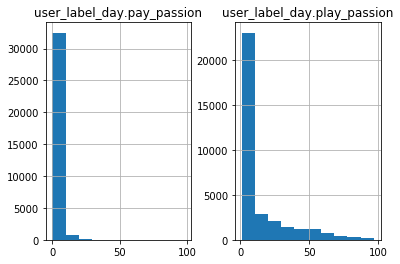

In [11]:
dataset[['user_label_day.play_passion','user_label_day.pay_passion']][dataset['user_label_day.fplatformname'] == '新浪平台'].hist()

#### 密度图（density plot）
密度图一般用于呈现连续变量，类似直方图，用平滑的线来描述数据的分布

array([<matplotlib.axes._subplots.AxesSubplot object at 0x16A3C170>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11079190>], dtype=object)

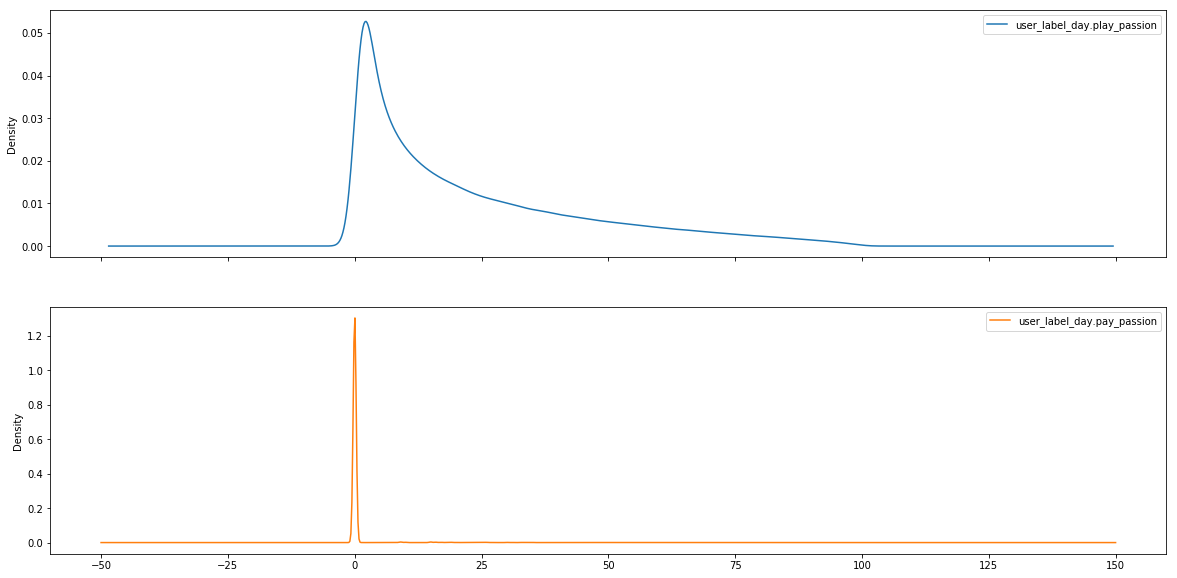

In [16]:
data1 = dataset[['user_label_day.play_passion','user_label_day.pay_passion']][dataset['user_label_day.fgamename'] == '地方棋牌']
data1.plot(kind='density',subplots=True)

#### 箱线图（box plot）
显示一组数据分散情况的统计图

user_label_day.play_passion       AxesSubplot(0.125,0.125;0.352273x0.755)
user_label_day.pay_passion     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

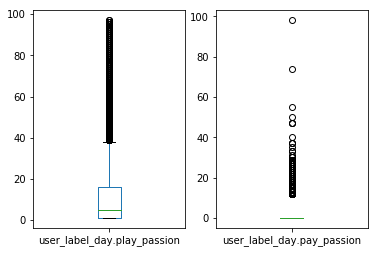

In [13]:
data1.plot(kind='box',subplots=True)

## 多重图表

#### 相关矩阵图
用来展示两个不同属性相互影响的程度  
如果两个属性按照相同的方向变化，说明是正向影响  
反之就是反向影响  


[Text(0,1,'user_label_day.fgamefsk'),
 Text(0,1,'user_label_day.fgamename'),
 Text(0,1,'user_label_day.fplatformfsk'),
 Text(0,1,'user_label_day.fplatformname')]

[Text(0,0,'user_label_day.fgamefsk'),
 Text(0,0,'user_label_day.fgamename'),
 Text(0,0,'user_label_day.fplatformfsk'),
 Text(0,0,'user_label_day.fplatformname')]

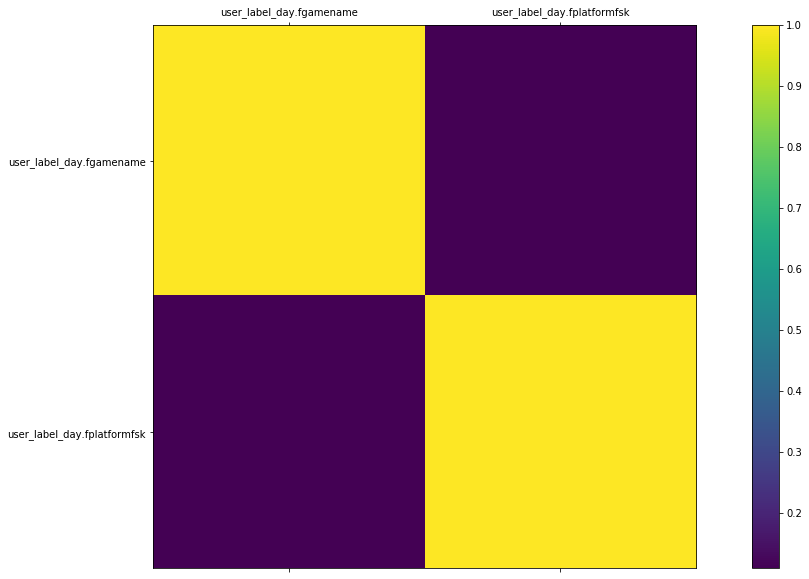

In [14]:
from IPython.core.pylabtools import figsize
figsize(20,10)
corraltions = data1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corraltions)
fig.colorbar(cax)
#ticks = np.arange(0,9,1)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
names = dataset.columns.values.tolist()
ax.set_xticklabels(names)
ax.set_yticklabels(names)

Object `figsize` not found.


#### 散点矩阵图（pairs plot）
会构建两种基本图形：直方图和散点图  

表示因变量随自变量变化的大致趋势。  
考察坐标点的分布，可以判断两个变量之间是否存在某种关联或总结坐标点的分布模式

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1108BF50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16AB1830>]], dtype=object)

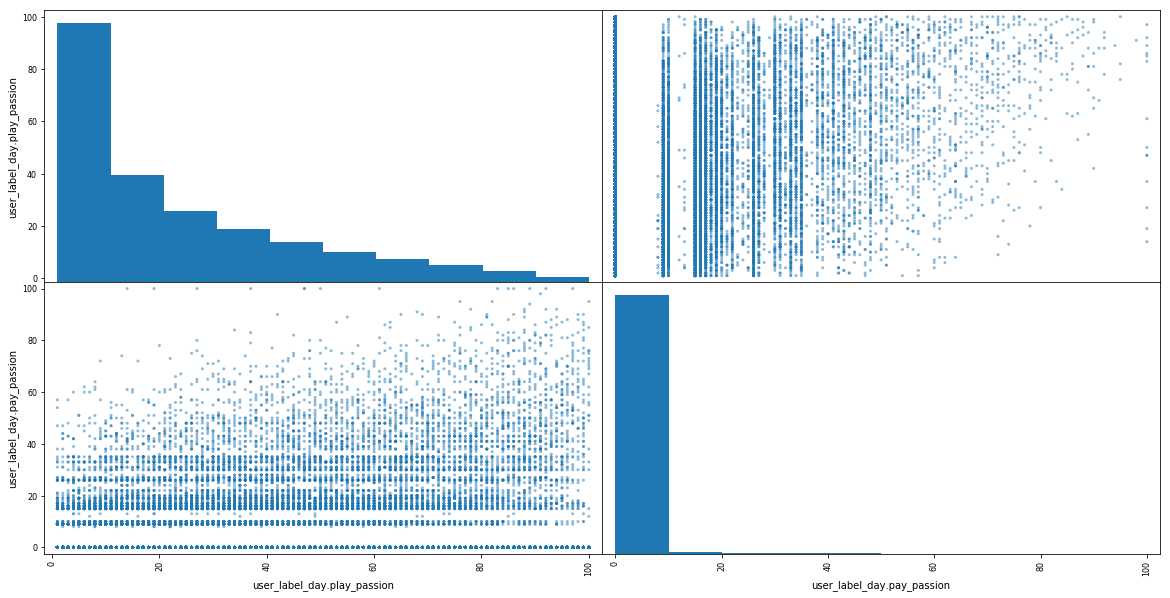

In [17]:

scatter_matrix(data1)